In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
fuel_data = pd.read_csv(url, error_bad_lines = False)
fuel_data.describe(include ='all')

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_1994_12_1_0_7,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [3]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [4]:
#use groupby to count sum of the unique value in the fuel unit column
fuel_data.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [5]:
# replace missing values in fuel unit column with'mcf'
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value = 'mcf')

In [6]:
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [7]:
fuel_data.groupby('report_year')['report_year'].count()

report_year
1994    1235
1995    1201
1996    1088
1997    1094
1998    1107
1999    1050
2000    1373
2001    1356
2002    1205
2003    1211
2004    1192
2005    1269
2006    1243
2007    1264
2008    1228
2009    1222
2010    1261
2011    1240
2012    1243
2013    1199
2014    1171
2015    1093
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [15]:
fuel_data.groupby('fuel_type_code_pudl')['fuel_type_code_pudl'].count()

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_type_code_pudl, dtype: int64

In [16]:
fuel_data.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [12]:
#Merging in pandas is like joining operations in  relational data base SQl
fuel_df1 = fuel_data.iloc[0:19000].reset_index(drop = True)
print(fuel_df1)

                      record_id  utility_id_ferc1  report_year  \
0         f1_fuel_1994_12_1_0_7                 1         1994   
1        f1_fuel_1994_12_1_0_10                 1         1994   
2         f1_fuel_1994_12_2_0_1                 2         1994   
3         f1_fuel_1994_12_2_0_7                 2         1994   
4        f1_fuel_1994_12_2_0_10                 2         1994   
...                         ...               ...          ...   
18995   f1_fuel_2009_12_182_1_9               182         2009   
18996  f1_fuel_2009_12_182_1_10               182         2009   
18997  f1_fuel_2009_12_182_1_13               182         2009   
18998  f1_fuel_2009_12_182_1_14               182         2009   
18999    f1_fuel_2009_12_79_0_1                79         2009   

           plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
0                  rockport                coal       ton        5377489.0   
1      rockport total plant                coal    

In [17]:
fuel_df2 = fuel_data.iloc[19000:].reset_index(drop=True)
print(fuel_df2 )

                     record_id  utility_id_ferc1  report_year  \
0       f1_fuel_2009_12_79_0_2                79         2009   
1       f1_fuel_2009_12_79_0_4                79         2009   
2       f1_fuel_2009_12_79_0_5                79         2009   
3       f1_fuel_2009_12_79_0_7                79         2009   
4      f1_fuel_2009_12_79_0_10                79         2009   
...                        ...               ...          ...   
10518  f1_fuel_2018_12_12_0_13                12         2018   
10519   f1_fuel_2018_12_12_1_1                12         2018   
10520  f1_fuel_2018_12_12_1_10                12         2018   
10521  f1_fuel_2018_12_12_1_13                12         2018   
10522  f1_fuel_2018_12_12_1_14                12         2018   

           plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
0                  montrose                 oil       bbl          22912.0   
1                hawthorn 5                coal       ton      

In [25]:
#check that the length of both dataframes sum to the expected lenght 
assert len(fuel_data) == (len(fuel_df1) + len(fuel_df2))
print(len(fuel_data))

29523


In [26]:
#inner merge will lose rows in both dfs
pd.merge(fuel_df1, fuel_df2, how="inner")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu


In [27]:
#outer lose rows in both dfs
pd.merge(fuel_df1, fuel_df2, how="outer")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [28]:
#left merge will lose rows in both dfs
pd.merge(fuel_df1, fuel_df2, how="left")

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.210,45.990,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.770,2.770,2.570
...,...,...,...,...,...,...,...,...,...,...,...
18995,f1_fuel_2009_12_182_1_9,182,2009,lake road,gas,mcf,340857.0,1.000000,4.711,4.711,4.711
18996,f1_fuel_2009_12_182_1_10,182,2009,lake road,oil,mcf,771.0,5.801544,84.899,84.899,14.634
18997,f1_fuel_2009_12_182_1_13,182,2009,iatan (18%),coal,ton,414142.0,16.718000,18.509,17.570,1.107
18998,f1_fuel_2009_12_182_1_14,182,2009,iatan (18%),oil,bbl,5761.0,5.537910,83.636,72.280,15.102


In [30]:
#to concatenate 
pd.concat([fuel_data, data_to_concat]).reset_index(drop=True)

NameError: name 'data_to_concat' is not defined

In [32]:
# to check for duplicate rows
fuel_data.duplicated().any()

False

# data viz and representation in python

In [33]:
#Importing plotting library
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [34]:
import seaborn as sns

In [35]:
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

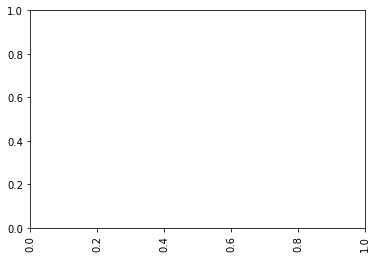

In [36]:
plt.xticks(rotation=90)

In [43]:
fuel_unit = pd.DataFrame({'unit': ['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU', 'MWDTH', 'MWHTH', 'TON'], 'count': [7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})

In [44]:
print(fuel_unit)

     unit  count
0     BBL   7998
1     GAL     84
2  GRAMSU    464
3     KGU    110
4     MCF  11354
5   MMBTU    180
6   MWDTH     95
7   MWHTH    100
8     TON   8958


Text(0.5, 0, 'fuel_unit')

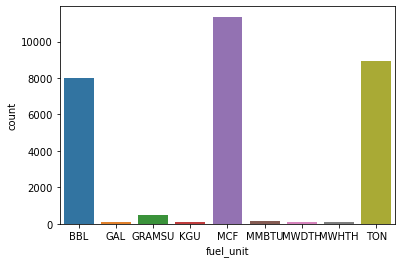

In [48]:
sns.barplot(data=fuel_unit, x= 'unit', y='count')
plt.xlabel('fuel_unit')

Text(0.5, 0, 'Fuel Unit')

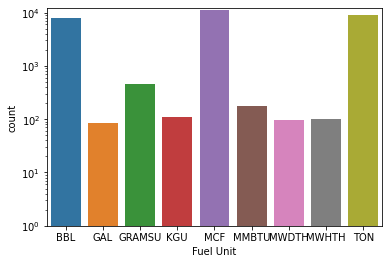

In [50]:
g=sns.barplot(data=fuel_unit, x= 'unit', y='count')
g.set_yscale ('log')
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')

Text(0.5, 0, 'Fuel Unit')

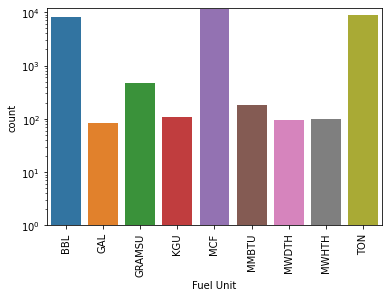

In [51]:
plt.xticks(rotation=90)
g=sns.barplot(data=fuel_unit, x= 'unit', y='count')
g.set_yscale ('log')
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')

In [ ]:
g=sns.barplot(data=fuel_unit, x= 'unit', y='count')
g.set_yscale ('log')
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')

In [70]:
#select a sample pf the dataset
sample_df= fuel_data.sample(n=50, random_state=4)

<AxesSubplot:xlabel='utility_id_ferc1', ylabel='fuel_cost_per_mmbtu'>

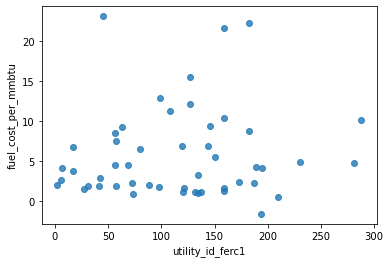

In [71]:
sns.regplot(x=sample_df['utility_id_ferc1'], y=sample_df['fuel_cost_per_mmbtu'], fit_reg=False)

<AxesSubplot:xlabel='fuel_type_code_pudl', ylabel='utility_id_ferc1'>

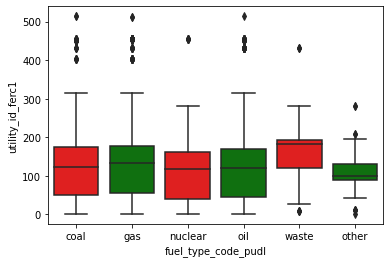

In [81]:
sns.boxplot(x='fuel_type_code_pudl', y='utility_id_ferc1', palette = ['r', 'g'],  data=fuel_data)

<AxesSubplot:xlabel='fuel_cost_per_unit_burned', ylabel='Density'>

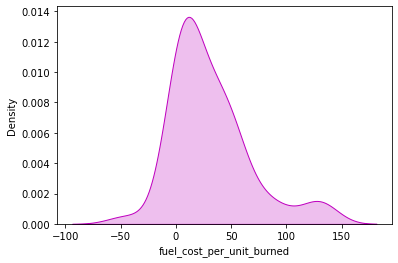

In [84]:
sns.kdeplot(sample_df['fuel_cost_per_unit_burned'], shade=True, color='m')